# Shor's Algorithm

Problem Statement: Given a periodic function f, find it's period.<br>
$$ f(x) = f(y), x \neq y \text{ iff } |x-y| = kp$$
Here $p$ is the period. <br>
We need a lot of data points for finding period.

### Classical Computers
Worst Case $\in O\left(exp\left(n^{\frac{1}{3}}(logn)^{\frac{2}{3}}\right)\right)$
### Quantum Computers
Worst Case $\in O\left(n^3 . log(n) . log\left(log(n)\right)\right)$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import *
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction

In [2]:
def modulo(x, N):
    """
    solve: x = r(mod N)
    return: r
    """
    return x - N * (x // N)

In [3]:
def factor_list(N):
    """
    Returns a list of valid x's that satisfy the condition for Shor's Algorithm
    We find x^r = 1 (mod N) where r is the period of the function then, x is allowed iff:
        1) r is even
        2) (x^r/2)^2 == 1 (mod N)
        3) x^r/2 != +- 1 (mod N)
    """
    factors = []
    for x in range(2, N):
        gcd_xN = gcd(x, N)
        if gcd_xN == x:
            factor = x
            factors.append(factor)
            continue
        elif gcd_xN != 1:
            if gcd_xN not in factors:
                factor = x
                factors.append(factor)  # needs to be edited
            continue
        else:  # gcd_xN == 1
            modulo_list = []
            period = 0
            for i in range(0, N):
                modulo_list.append(modulo(x**i, N))
                if modulo_list[i] == 1 and i != 0:
                    period = i
                    break
            if period % 2 == 0:
                # r is even now
                mod = modulo(x ** (period / 2), N)
                mod2 = modulo(x**period, N)
                if mod2 == 1:
                    # (x^(r/2))^2 = 1 (mod N)
                    if mod != 1 and mod != -1:
                        # x^(r/2) != +- 1 (mod N)
                        factor = x
                        factors.append(factor)
                        continue
            else:
                # r is odd, N could be a perfect square
                mod2 = modulo(x**period, N)
                if mod2 == -1:
                    return factors
    return factors

In [4]:
print(factor_list(49))

[3, 5, 6, 7, 10, 12, 13, 17, 19, 20, 24, 26, 27, 31, 33, 34, 38, 40, 41, 45, 47, 48]


In literature I found a paper that used x = 19 for period finding. I shall use 31

### Period Finding for N = 49 using x = 31

In [5]:
modulo_list = []
N = 49
x = 31
period = 0
for i in range(0, N):
    modulo_list.append(modulo(x**i, N))
    if modulo_list[i] == 0:
        break
    if modulo_list[i] == 1 and i != 0:
        period = i
        print(f"Period: {period}")
        break
print(modulo_list)
for i in range(1, period):
    if N - modulo_list[i] < modulo_list[i]:
        modulo_list[i] -= N
print(modulo_list)

Period: 6
[1, 31, 30, 48, 18, 19, 1]
[1, -18, -19, -1, 18, 19, 1]


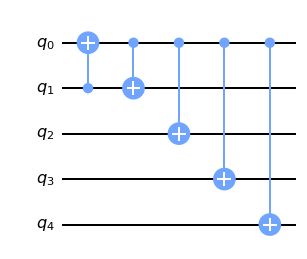

In [6]:
U_31 = QuantumCircuit(5)
U_31.cx(1, 0)
U_31.cx(0, range(1, 5))
U_31.draw("mpl")
U_31 = U_31.to_gate()
U_31.name = "%i$^i$ (mod %i)" % (x, N)

Initial State: {'00001': 1024}
After one gate: {'11111': 1024}
After two gates: {'11110': 1024}
After three gates: {'00001': 1024}


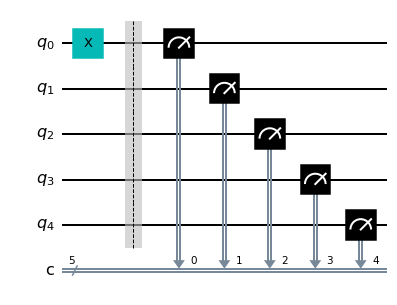

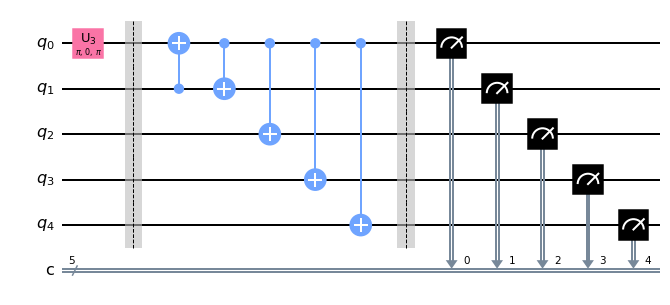

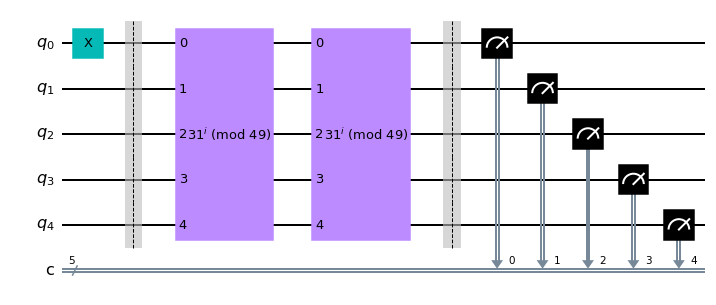

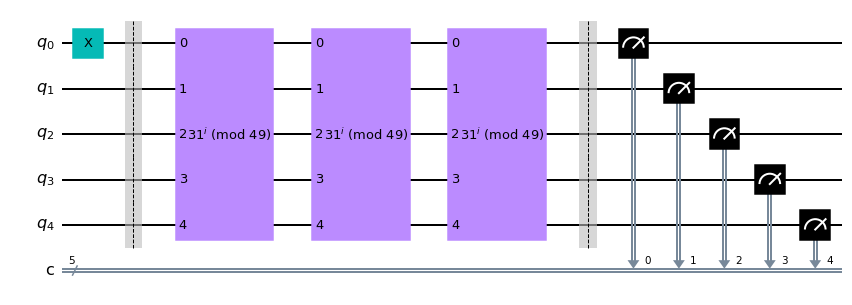

In [7]:
qc0 = QuantumCircuit(5, 5)
qc0.x(0)
qc0.barrier()
qc0.measure(range(5), range(5))
fig = qc0.draw("mpl")
simulator = Aer.get_backend("qasm_simulator")
result = execute(qc0, backend=simulator, shots=1024).result()
counts = result.get_counts()
print(f"Initial State: {counts}")

qc = QuantumCircuit(5, 5)
qc.x(0)
qc.barrier()
qc.append(U_31, range(5))
qc.barrier()
qc.measure(range(5), range(5))
fig = qc.decompose().draw("mpl")
simulator = Aer.get_backend("qasm_simulator")
result = execute(qc, backend=simulator, shots=1024).result()
counts = result.get_counts()
print(f"After one gate: {counts}")

qc2 = QuantumCircuit(5, 5)
qc2.x(0)
qc2.barrier()
for i in range(2):
    qc2.append(U_31, range(5))
qc2.barrier()
qc2.measure(range(5), range(5))
fig = qc2.draw("mpl")
simulator = Aer.get_backend("qasm_simulator")
result = execute(qc2, backend=simulator, shots=1024).result()
counts = result.get_counts()
print(f"After two gates: {counts}")

qc3 = QuantumCircuit(5, 5)
qc3.x(0)
qc3.barrier()
for i in range(3):
    qc3.append(U_31, range(5))
qc3.barrier()
qc3.measure(range(5), range(5))
fig = qc3.draw("mpl")
simulator = Aer.get_backend("qasm_simulator")
result = execute(qc3, backend=simulator, shots=1024).result()
counts = result.get_counts()
print(f"After three gates: {counts}")

### For N = 49 and x = 19

In [8]:
modulo_list = []
N = 49
x = 19
period = 0
for i in range(0, N):
    modulo_list.append(modulo(x**i, N))
    if modulo_list[i] == 0:
        break
    if modulo_list[i] == 1 and i != 0:
        period = i
        print(f"Period: {period}")
        break
print(modulo_list)
for i in range(1, period):
    if N - modulo_list[i] < modulo_list[i]:
        modulo_list[i] -= N
print(modulo_list)

Period: 6
[1, 19, 18, 48, 30, 31, 1]
[1, 19, 18, -1, -19, -18, 1]


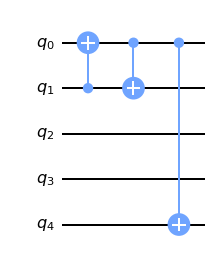

In [9]:
U_19 = QuantumCircuit(5)
U_19.cx(1, 0)
U_19.cx(0, [1, 4])
U_19.draw("mpl")
U_19 = U_19.to_gate()
U_19.name = "%i$^i$ (mod %i)" % (x, N)

Initial State: {'00001': 1024}
After one gate: {'10011': 1024}
After two gates: {'10010': 1024}
After three gates: {'00001': 1024}


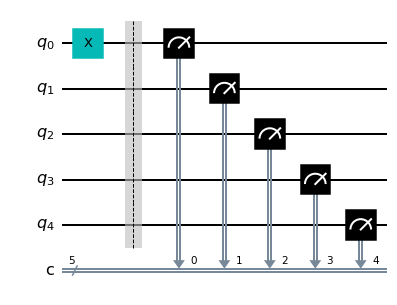

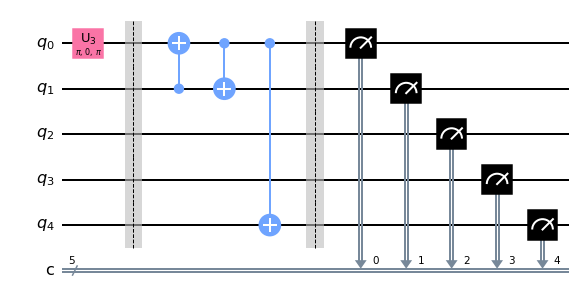

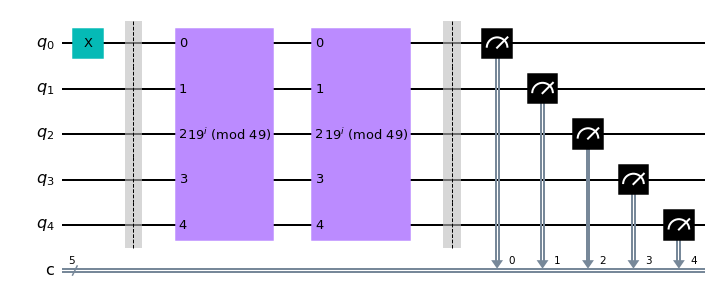

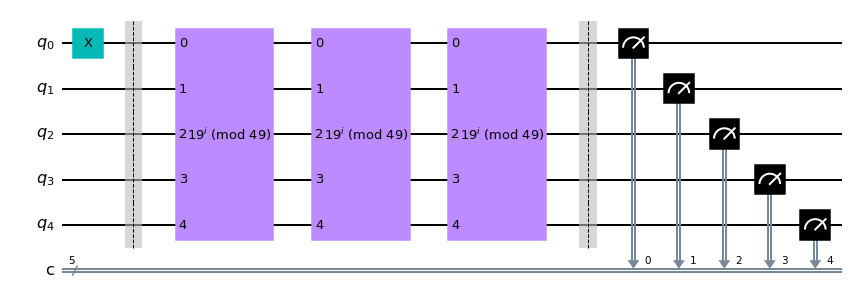

In [11]:
qc0 = QuantumCircuit(5, 5)
qc0.x(0)
qc0.barrier()
qc0.measure(range(5), range(5))
fig = qc0.draw("mpl")
simulator = Aer.get_backend("qasm_simulator")
result = execute(qc0, backend=simulator, shots=1024).result()
counts = result.get_counts()
print(f"Initial State: {counts}")

qc = QuantumCircuit(5, 5)
qc.x(0)
qc.barrier()
qc.append(U_19, range(5))
qc.barrier()
qc.measure(range(5), range(5))
fig = qc.decompose().draw("mpl")
simulator = Aer.get_backend("qasm_simulator")
result = execute(qc, backend=simulator, shots=1024).result()
counts = result.get_counts()
print(f"After one gate: {counts}")

qc2 = QuantumCircuit(5, 5)
qc2.x(0)
qc2.barrier()
for i in range(2):
    qc2.append(U_19, range(5))
qc2.barrier()
qc2.measure(range(5), range(5))
fig = qc2.draw("mpl")
simulator = Aer.get_backend("qasm_simulator")
result = execute(qc2, backend=simulator, shots=1024).result()
counts = result.get_counts()
print(f"After two gates: {counts}")

qc3 = QuantumCircuit(5, 5)
qc3.x(0)
qc3.barrier()
for i in range(3):
    qc3.append(U_19, range(5))
qc3.barrier()
qc3.measure(range(5), range(5))
fig = qc3.draw("mpl")
simulator = Aer.get_backend("qasm_simulator")
result = execute(qc3, backend=simulator, shots=1024).result()
counts = result.get_counts()
print(f"After three gates: {counts}")

In [12]:
modulo(7**2, 25*19)

49

In [19]:
for i in range(21):
    print (f"{i}: {modulo(7**i, 25*19)}")

0: 1
1: 7
2: 49
3: 343
4: 26
5: 182
6: 324
7: 368
8: 201
9: 457
10: 349
11: 68
12: 1
13: 7
14: 49
15: 343
16: 26
17: 182
18: 324
19: 368
20: 201


1) Quantum adders and multipliers, use it to execture period finding using quantum gates and qft.

2) Look for pattern in all possible a's for 49

3) Implement this with quantum gatees, qft dageer and so on.

In [18]:
modulo_list = []
N = 49
x = 13
period = 0
for i in range(0, N):
    modulo_list.append(modulo(x**i, N))
    if modulo_list[i] == 0:
        break
    if modulo_list[i] == 1 and i != 0:
        period = i
        print(f"Period: {period}")
        break
print(modulo_list)
for i in range(1, period):
    if N - modulo_list[i] < modulo_list[i]:
        modulo_list[i] -= N
print(modulo_list)

Period: 14
[1, 13, 22, 41, 43, 20, 15, 48, 36, 27, 8, 6, 29, 34, 1]
[1, 13, 22, -8, -6, 20, 15, -1, -13, -22, 8, 6, -20, -15, 1]
